#### Maps for Merry

Make pretty MUSE maps for Merry's CARS/*Chandra* paper. 

Grant R. Tremblay (Center for Astrophysics | Harvard & Smithsonian)

In [231]:
import os
import sys
import glob

import warnings
warnings.filterwarnings('ignore') # Some things we'll be doing throw runtimewarnings that we won't care about. 

from astropy.io import fits
from astropy.wcs import WCS
import astropy.constants as const
import astropy.units as u
from astropy.visualization import astropy_mpl_style

import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm

### This is magic for Jupyer Notebooks. 
### Delete if putting into a script!
%matplotlib inline 
#######################################

import imageio

In [232]:
def styleplots():
    """
    Make plots pretty and labels clear.
    """
    plt.style.use('ggplot')

    labelsizes = 20

    plt.rcParams['font.size'] = labelsizes
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['axes.titlesize'] = labelsizes
    plt.rcParams['axes.labelsize'] = labelsizes
    plt.rcParams['xtick.labelsize'] = labelsizes
    plt.rcParams['ytick.labelsize'] = labelsizes
    
styleplots()

In [233]:
cars_data_directory = 'data/'

In [264]:
os.listdir(cars_data_directory)

['HE0227-0913.eline_table.fits',
 'HE0227-0913.kin_table.fits',
 'HE0227-0913_FOV_SDSSi.fits',
 'HE0351+0240.eline_table.fits',
 'HE0351+0240.kin_table.fits',
 'HE0351+0240_FOV_SDSSi.fits']

### Setup

In [295]:
he0227_redshift = 0.0165
he0351_redshift = 0.034

In [296]:
he0227_fovimage = cars_data_directory + "HE0227-0913_FOV_SDSSi.fits"
he0351_fovimage = cars_data_directory + "HE0351+0240_FOV_SDSSi.fits"

In [327]:
def show_fovimage(fovimage, name, vmin=0.001, vmax=0.5, cmap=cm.magma, nanthresh=0.0, nancolor='white'):
    '''Show a collapsed MUSE image.'''
    
    data = fits.getdata(fovimage)
    wcs = WCS(fits.getheader(fovimage), 1)
    
    data[data < nanthresh] = np.nan
    
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(projection=wcs)

    ax.coords[0].set_axislabel('Right Ascension')
    ax.coords[1].set_axislabel('Declination')

    cmap.set_bad(nancolor) # We set NaNs to be white here. 

    ax.set_title('{} \nCollapsed MUSE Image'.format(name))

    ax.tick_params(labelsize=14)

    frame = ax.imshow(data, origin='lower', norm=LogNorm(), vmin=vmin, vmax=vmax, cmap=cmap, interpolation='None')
    

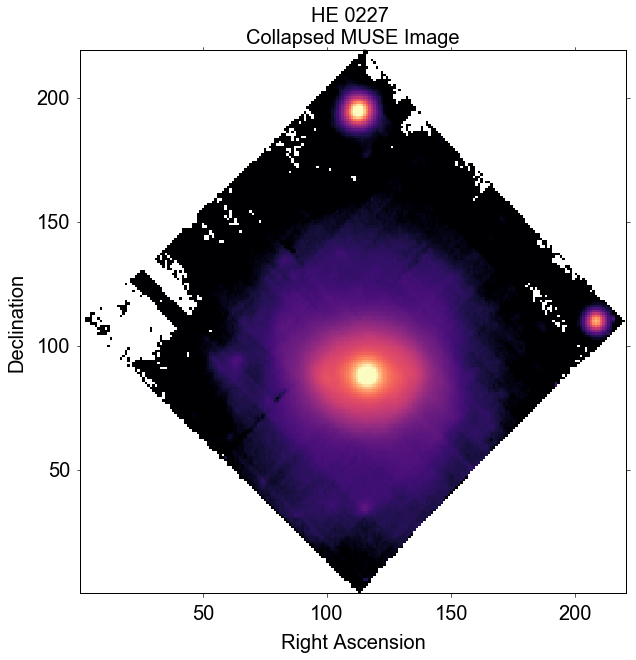

In [328]:
show_fovimage(he0227_fovimage, name="HE 0227")

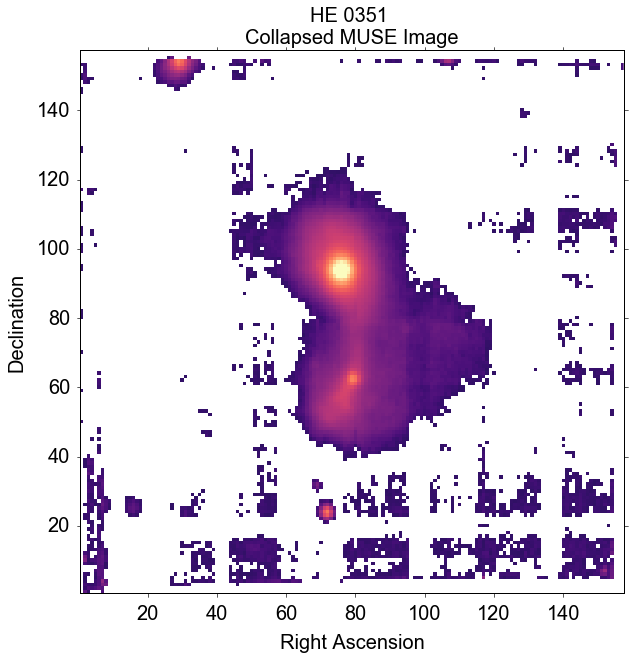

In [329]:
show_fovimage(he0351_fovimage, "HE 0351", nanthresh=0.003)